# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [3]:
import pandas as pd

df = pd.read_csv("data/nndb_flat.csv")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


### Mira la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

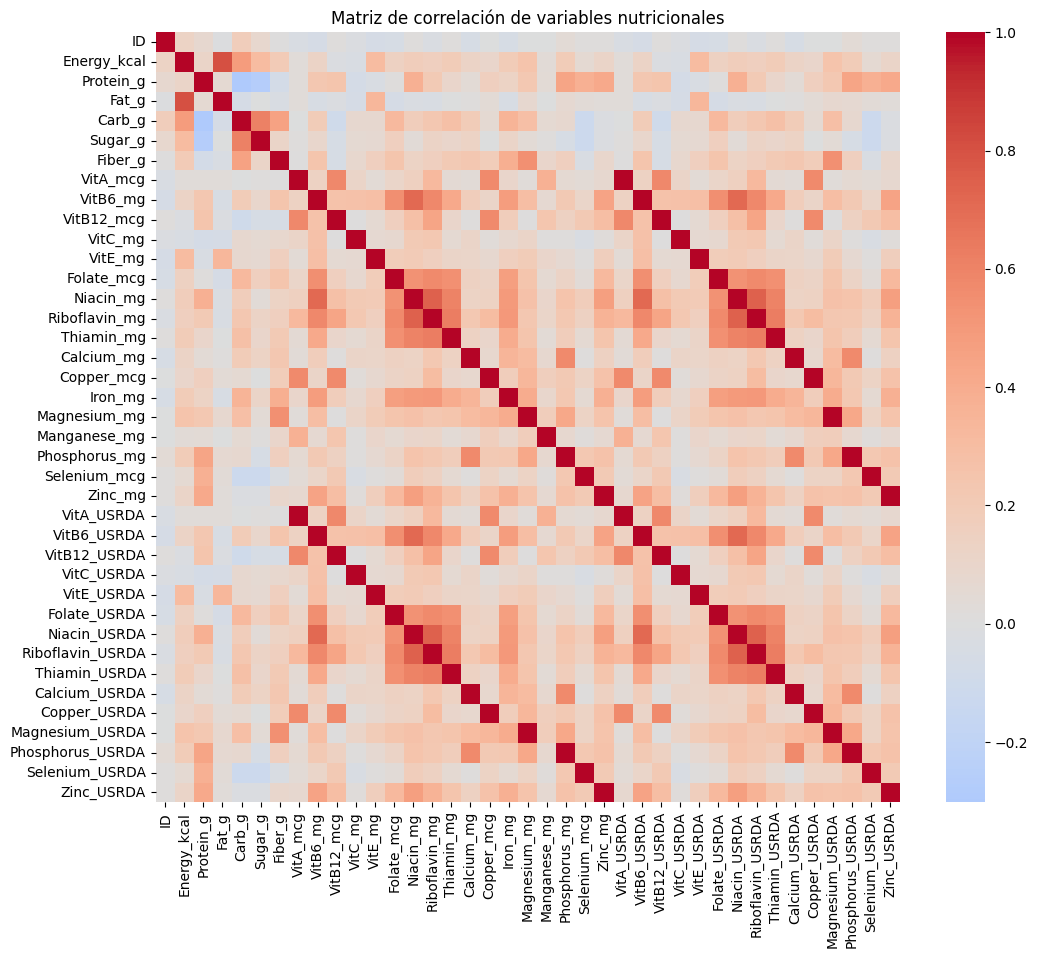

In [4]:
# Seleccionar solo variables numéricas
num_df = df.select_dtypes(include=["int64", "float64"])

# Matriz de correlación
corr = num_df.corr()

# Visualización
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de correlación de variables nutricionales")
plt.show()


In [5]:
corr

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,1.000000,0.126126,0.075538,-0.011996,0.177297,0.082710,0.008252,-0.031211,-0.060463,0.016512,...,-0.051166,0.010387,-0.024343,0.011311,-0.050720,-0.003765,-0.001867,0.045925,0.011775,0.009195
Energy_kcal,0.126126,1.000000,0.110302,0.806795,0.487096,0.313151,0.197338,0.026329,0.121872,-0.012292,...,0.145936,0.174991,0.155830,0.187439,0.123571,0.099513,0.255880,0.195181,0.056673,0.112766
Protein_g,0.075538,0.110302,1.000000,0.054715,-0.301974,-0.266170,-0.072777,0.026483,0.228485,0.245423,...,0.008939,0.376939,0.202480,0.098360,0.046888,0.158900,0.218611,0.444608,0.378369,0.416315
Fat_g,-0.011996,0.806795,0.054715,1.000000,-0.054116,-0.001962,-0.028842,0.024379,-0.046950,-0.020786,...,-0.058049,-0.022671,-0.036286,-0.005785,0.015039,0.042765,0.070781,0.066086,0.037559,0.028264
Carb_g,0.177297,0.487096,-0.301974,-0.054116,1.000000,0.615344,0.458192,0.001871,0.195571,-0.094636,...,0.325170,0.173285,0.232408,0.281809,0.189106,0.062106,0.287207,0.073180,-0.114600,-0.012187
Sugar_g,0.082710,0.313151,-0.266170,-0.001962,0.615344,1.000000,0.115916,0.010143,0.088767,-0.050450,...,0.161257,0.034378,0.125225,0.097751,0.129540,-0.005837,0.041308,-0.049784,-0.123708,-0.021991
Fiber_g,0.008252,0.197338,-0.072777,-0.028842,0.458192,0.115916,1.000000,0.005910,0.242804,-0.052045,...,0.249075,0.135257,0.157703,0.205211,0.232286,0.185044,0.542038,0.158422,-0.035897,0.085154
VitA_mcg,-0.031211,0.026329,0.026483,0.024379,0.001871,0.010143,0.005910,1.000000,0.136605,0.581004,...,0.108517,0.151679,0.325709,0.052921,0.034822,0.569945,0.024572,0.055814,0.048043,0.070541
VitB6_mg,-0.060463,0.121872,0.228485,-0.046950,0.195571,0.088767,0.242804,0.136605,1.000000,0.264325,...,0.550087,0.714143,0.581678,0.417011,0.177268,0.116326,0.293169,0.213395,0.109004,0.447143
VitB12_mcg,0.016512,-0.012292,0.245423,-0.020786,-0.094636,-0.050450,-0.052045,0.581004,0.264325,1.000000,...,0.158483,0.279033,0.436182,0.099601,0.011715,0.570642,0.004124,0.148774,0.215308,0.298136


In [6]:
#HAY QUE ELIMINAR TODAS LAS COLUMNAS USRDA
df_no_usrda = df.loc[:, ~df.columns.str.contains("USRDA")]


### Variables no numéricas
Elimina las variables de texto del dataset

In [7]:
df_numeric = df_no_usrda.select_dtypes(include=["int64", "float64"])


### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables realizando una transformación Logarítmica.

In [8]:
import numpy as np

df_log = np.log1p(df_numeric)
#log1p --> Evita errores con ceros, Reduce asimetría,  Mantiene el orden relativo de los datos


### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [9]:
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(df_log)

# Convertir de nuevo a DataFrame (opcional pero recomendable)
df_scaled = pd.DataFrame(
    X_scaled,
    columns=df_log.columns,
    index=df_log.index
)


### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [10]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(df_scaled)


,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

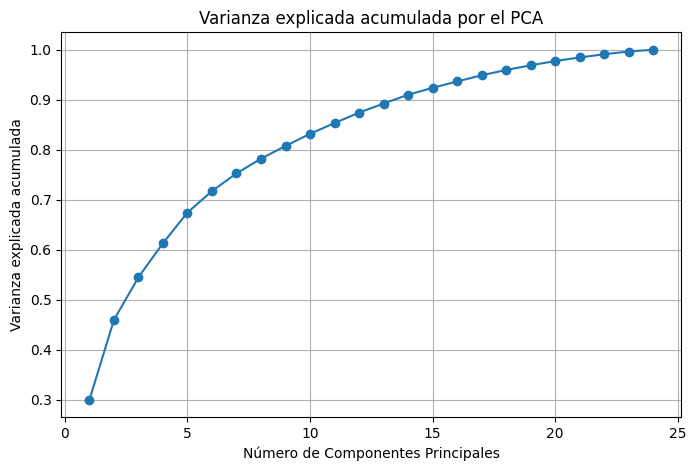

In [11]:
# Varianza explicada acumulada
varianza_acumulada = pca.explained_variance_ratio_.cumsum()

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o')
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza explicada acumulada")
plt.title("Varianza explicada acumulada por el PCA")
plt.grid(True)
plt.show()


## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [12]:
# Número de componentes elegidas
X = 6

# Nuevo PCA reducido
pca_reduced = PCA(n_components=X)

# Ajustar y transformar los datos escalados
X_pca = pca_reduced.fit_transform(df_scaled)


In [13]:
# Crear DataFrame con las componentes principales
df_pca = pd.DataFrame(
    X_pca,
    columns=[f"PC{i+1}" for i in range(X)],
    index=df_scaled.index
)


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [14]:
# Añadir FoodGroup al dataset reducido
df_pca_fg = df_pca.copy()
df_pca_fg["FoodGroup"] = df["FoodGroup"]


In [15]:
# Diccionario para guardar resultados
top_groups_per_pc = {}

for pc in df_pca.columns:
    top_groups = (
        df_pca_fg
        .groupby("FoodGroup")[pc]
        .mean()
        .sort_values(ascending=False)
        .head(3)
    )
    top_groups_per_pc[pc] = top_groups


In [16]:
for pc, groups in top_groups_per_pc.items():
    print(f"\n🔹 {pc} – Top 3 Food Groups")
    print(groups)



🔹 PC1 – Top 3 Food Groups
FoodGroup
Breakfast Cereals        4.001172
Nut and Seed Products    3.118251
Spices and Herbs         2.476735
Name: PC1, dtype: float64

🔹 PC2 – Top 3 Food Groups
FoodGroup
Spices and Herbs         3.722454
Breakfast Cereals        2.766495
Nut and Seed Products    2.267556
Name: PC2, dtype: float64

🔹 PC3 – Top 3 Food Groups
FoodGroup
Baked Products    1.904084
Fats and Oils     1.645304
Sweets            1.357549
Name: PC3, dtype: float64

🔹 PC4 – Top 3 Food Groups
FoodGroup
Breakfast Cereals    2.228610
Fats and Oils        1.326352
Baby Foods           0.565386
Name: PC4, dtype: float64

🔹 PC5 – Top 3 Food Groups
FoodGroup
Fats and Oils             3.144437
Dairy and Egg Products    2.447488
Baby Foods                1.087219
Name: PC5, dtype: float64

🔹 PC6 – Top 3 Food Groups
FoodGroup
Fats and Oils            2.063702
Nut and Seed Products    1.742025
Spices and Herbs         1.378643
Name: PC6, dtype: float64
